In [8]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [9]:
#Load the Dataset
data = pd.read_csv('baseballcase_data.csv')

In [12]:
#Checking for missing values of salary
missing_count = data['Salary'].isnull().sum()
print(f"Missing values in 'Salary': {missing_count}")

Missing values in 'Salary': 0


In [14]:
#Drop any rows where Salary is missing 
data = data.dropna(subset=['Salary'])

In [16]:
data.head()

,Player,Year,Team,Pos,Age,G,PA,AB,R,H,...,SO_p,SV,TB_tm,WHIP,WP,cgSHO,tmSHO,Payroll,Attendance,Switch
0,Carlos Garcia,1998,ANA,2B,30,19,40,35,4,5,...,1091.0,52.0,2339.0,1.462,70.0,1.0,5.0,7.583155e+07,2555874.0,True
1,Dave Hollins,1998,ANA,3B,32,101,418,363,60,88,...,1091.0,52.0,2339.0,1.462,70.0,1.0,5.0,4.881250e+07,2454303.0,True
2,Randy Velarde,1998,ANA,2B,35,51,224,188,29,49,...,1091.0,52.0,2339.0,1.462,70.0,1.0,5.0,6.914788e+07,2519280.0,False
3,Gregg Jefferies,1998,"ANA, PHI",2B,30,144,592,555,72,167,...,1176.0,32.0,2218.0,1.381,73.0,3.0,10.0,2.749039e+07,1409391.0,True
4,Devon White,1998,ARI,CF,35,146,627,563,84,157,...,908.0,37.0,2157.0,1.363,52.0,2.0,6.0,8.975073e+07,3089222.0,True


In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Columns: 274 entries, Player to Switch
dtypes: bool(1), float64(222), int64(37), object(14)
memory usage: 3.9+ MB
None


In [20]:
print(data.describe())

              Year          Age            G           PA           AB  \
count  1878.000000  1878.000000  1878.000000  1878.000000  1878.000000   
mean   2005.421193    31.521832   111.121406   411.886581   366.264111   
std       4.481765     3.606409    36.871693   185.553888   164.557956   
min    1998.000000    20.000000     4.000000     6.000000     4.000000   
25%    2002.000000    29.000000    87.000000   253.250000   225.000000   
50%    2005.000000    31.000000   118.000000   422.000000   376.500000   
75%    2009.000000    34.000000   142.000000   578.750000   513.000000   
max    2013.000000    46.000000   163.000000   754.000000   699.000000   

                 R            H           2B           3B           HR  ...  \
count  1878.000000  1878.000000  1878.000000  1878.000000  1878.000000  ...   
mean     50.941427    98.928115    19.760383     1.878062    11.717252  ...   
std      28.998517    49.711417    10.942777     2.342205    10.144582  ...   
min       0.00000

In [22]:
#Summary stats for salary
pd.options.display.float_format = '{:,.2f}'.format
print("Summary statistics for salary:")
print(data['Salary'].describe())

Summary statistics for salary:
count        1,878.00
mean     3,629,472.51
std      3,697,581.90
min        170,000.00
25%        853,750.00
50%      2,407,500.00
75%      5,000,000.00
max     23,428,571.00
Name: Salary, dtype: float64


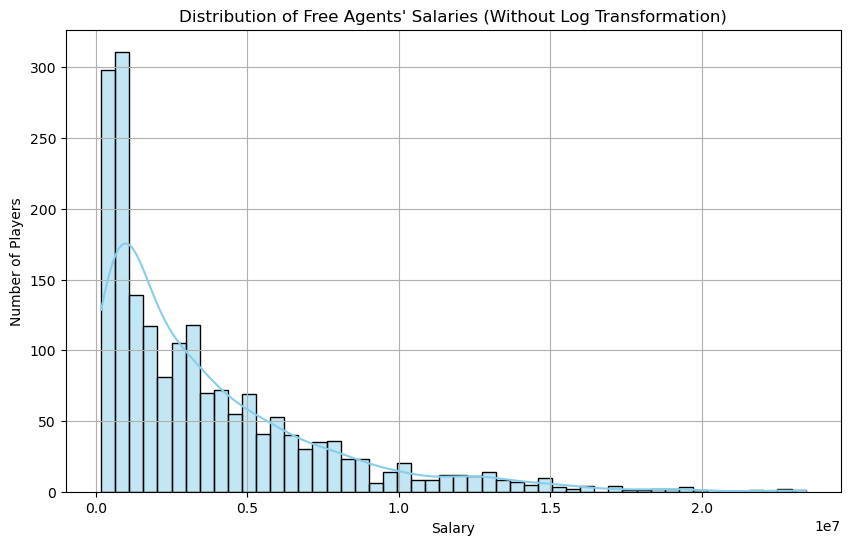

In [24]:
# Plot histogram of salary 
plt.figure(figsize=(10,6))
sns.histplot(data['Salary'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Free Agents\' Salaries (Without Log Transformation)')
plt.xlabel('Salary')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()


In [26]:
# Analysis of Raw Salary Distribution (Before Log Transformation):

# - The histogram shows that most free agent players earn relatively low salaries.
# - There is a very high peak near the lower salary values (close to $0 to $1 million).
# - The frequency of players decreases quickly as salaries increase.
# - A few players earn extremely high salaries (up to $30 million), but these are rare.
# - The distribution is highly right-skewed, with a long tail stretching towards very high salaries.
# - Because of this skewness, the mean salary is much higher than the median salary.
# - This skewness can make it difficult to model salaries accurately using simple linear models.
# - A transformation like log(Salary) is helpful to make the data more symmetric and easier to model.


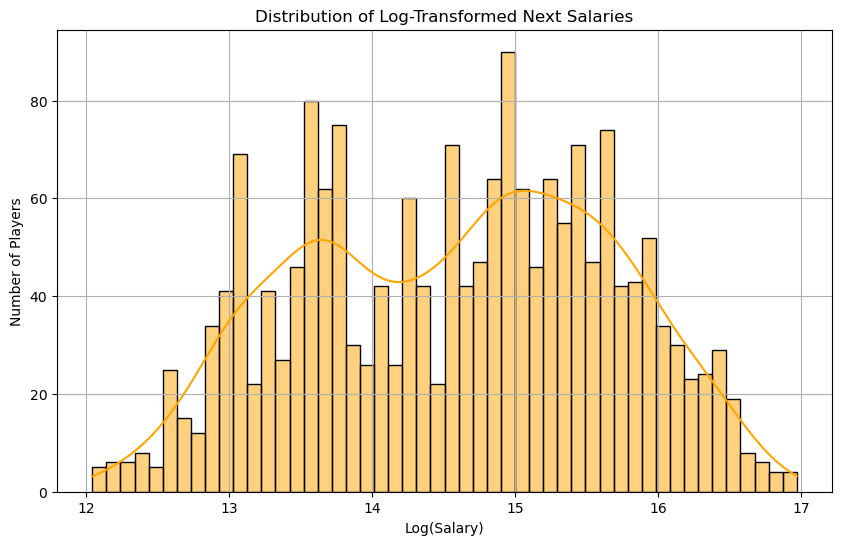

In [28]:
#Create separate variable for the log-transformed salary
log_salary = np.log1p(data['Salary'])

#Plot the log-transformed salary
plt.figure(figsize=(10,6))
sns.histplot(log_salary, bins=50, kde=True, color='orange')
plt.title('Distribution of Log-Transformed Next Salaries')
plt.xlabel('Log(Salary)')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()

In [30]:
# Analysis: Should we use a single model to predict salaries?

# - The salary distribution is highly right-skewed.
# - Most players earn relatively modest salaries (around $1–6 million).
# - A few superstar players earn extremely high salaries (up to $30+ million).

# This causes two main problems if we use a single simple model:
# 
# 1. Overfitting to outliers:
#    - The model might focus too much on the very high salaries.
#    - It would not generalize well to the majority of players.
# 
# 2. Under-predicting regular players:
#    - If the model fits most players well, it might completely miss the extremely high salaries.
# 
# Conclusion:
# - A log transformation on Salary can help


# Analysis of Salary Distribution and Log Transformation: Are there any variable transformations that would be potentially useful to apply?

# - From the summary statistics:
#     - The average (mean) salary is about $4.15 million.
#     - Salaries range from $0 up to $30.9 million.
#     - The median salary ($2.59 million) is much lower than the mean, showing that salaries are right-skewed.
#     - This suggests that most players earn moderate salaries, but a few superstars earn extremely high salaries.

# - After applying the log transformation:
#     - The distribution of log-transformed salaries looks much more normal (bell-shaped).
#     - The histogram shows that the extreme skewness has been reduced.
#     - Most players now cluster around a middle salary range after transformation.

# - Conclusion: Are there any variable transformations that would be potentially useful to apply?
#     - Using log(salary) instead of raw salary makes the data more suitable for modeling.
#     - It helps minimize the impact of outliers (very high salaries) on the model.


In [32]:
#Checking for missing values of next salary adj
missing_count = data['Next Salary ADJ'].isnull().sum()
print(f"Missing values in 'Next Salary ADJ': {missing_count}")

Missing values in 'Next Salary ADJ': 0


In [34]:
# Fill missing 'Next Salary ADJ' with Median
zero_salary = data['Next Salary ADJ'].median()
data['Next Salary ADJ'] = data['Next Salary ADJ'].fillna(zero_salary)

In [36]:
#Group salaries by Year and get stats
salary_by_year = data.groupby('Year')['Next Salary ADJ'].agg(['mean', 'median', 'std']).reset_index()

In [38]:
#Display Summary Stats
print("Summary Statistics of Salary by Year:")
print(salary_by_year)

Summary Statistics of Salary by Year:
    Year         mean       median          std
0   1998 2,746,848.26 1,283,783.39 3,118,606.47
1   1999 2,857,804.54 1,522,353.77 2,599,075.04
2   2000 3,933,598.54 2,010,220.46 4,431,687.35
3   2001 3,770,998.68 2,373,357.06 3,605,456.25
4   2002 4,204,397.66 2,224,968.44 4,149,841.08
5   2003 3,569,056.64 1,450,174.47 4,189,823.43
6   2004 3,785,299.43 2,436,505.65 3,805,222.18
7   2005 4,016,732.12 2,647,205.96 3,967,365.55
8   2006 4,442,564.59 3,440,812.77 3,919,978.42
9   2007 5,661,692.72 3,504,206.70 5,697,321.39
10  2008 4,602,358.99 2,779,403.49 4,710,302.39
11  2009 3,601,203.23 2,174,882.69 3,691,340.32
12  2010 4,564,825.14 3,106,749.37 4,292,939.28
13  2011 4,599,760.31 3,091,101.11 4,529,877.37
14  2012 5,201,529.74 3,160,538.59 4,409,377.60
15  2013 5,444,379.81 3,525,000.00 5,265,199.89


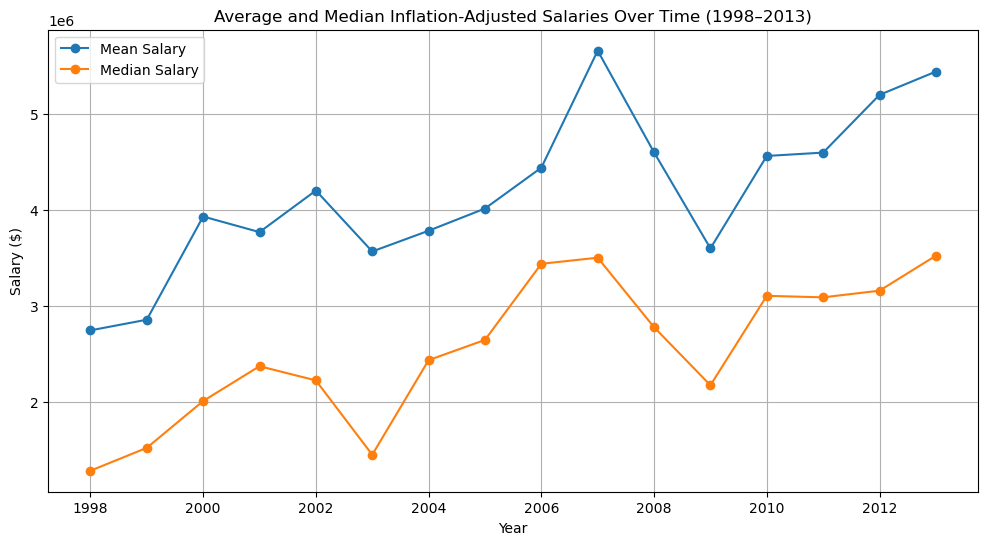

In [40]:
# Plot Mean and Median Salaries Over Time
plt.figure(figsize=(12,6))
plt.plot(salary_by_year['Year'], salary_by_year['mean'], marker='o', label='Mean Salary')
plt.plot(salary_by_year['Year'], salary_by_year['median'], marker='o', label='Median Salary')
plt.title('Average and Median Inflation-Adjusted Salaries Over Time (1998–2013)')
plt.xlabel('Year')
plt.ylabel('Salary ($)')
plt.legend()
plt.grid(True)
plt.show()

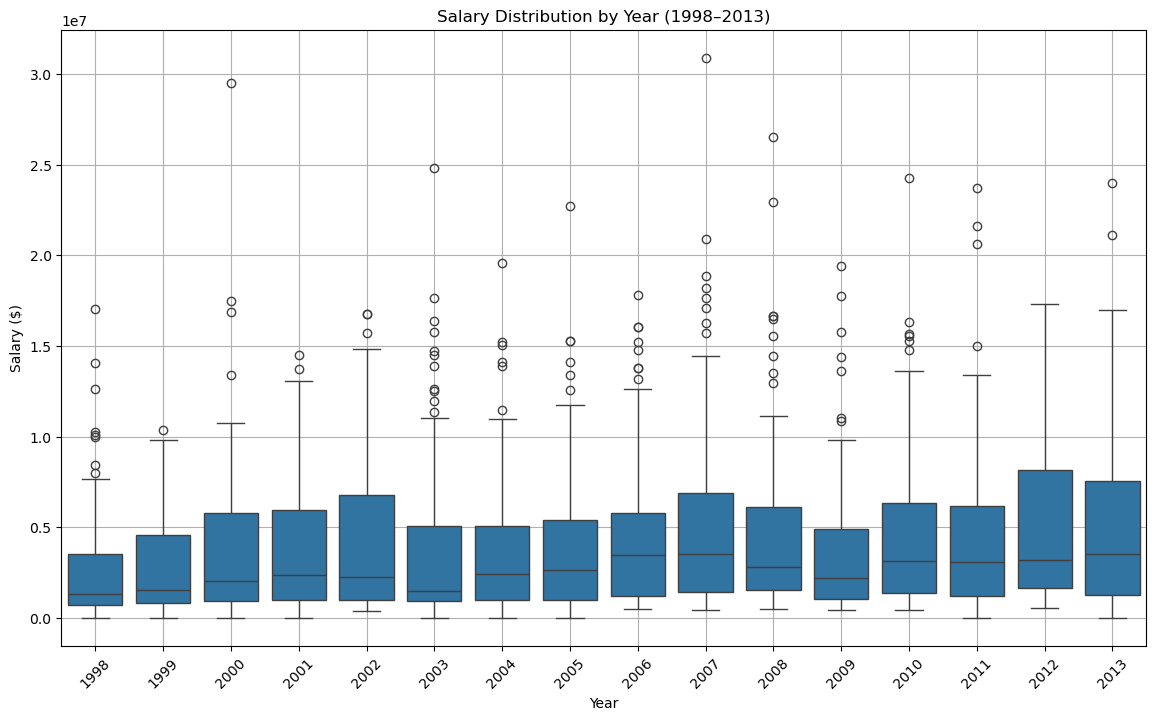

In [42]:
# Plot Boxplot of Salaries by Year
plt.figure(figsize=(14,8))
sns.boxplot(x='Year', y='Next Salary ADJ', data=data)
plt.title('Salary Distribution by Year (1998–2013)')
plt.xlabel('Year')
plt.ylabel('Salary ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [44]:
# Analysis: Changes in the Distribution of Inflation-Adjusted Salaries Over Time (1998–2013)

# - The mean and median salaries generally increased over time, showing a systematic upward trend in player earnings.
# 
# - The median salary (orange line) rose more steadily compared to the mean salary (blue line),
#   which had some sharper jumps and dips, especially around 2007–2009.
# 
# - The mean being consistently higher than the median suggests that some very large superstar contracts
#   pulled the average salary upward while most players earned closer to the median.
# 
# - The boxplots show that the spread (range) of salaries widened over time.
#   - In early years like 1998–2003, the salary range was narrower.
#   - In later years like 2010–2013, there were many more outliers (players earning extremely high salaries).
# 
# - The overall shape of the salary distribution also became more skewed over time,
#   with a growing number of high-end outliers.
# 
# Conclusion:
# - Salaries systematically increased from 1998 to 2013.
# - Salary inequality also grew larger, with top players pulling away from the middle group.
# - This shows that while all players benefited somewhat from rising salaries, star players benefited much more.


In [46]:
#Select only numerical columns 
n_data = data.select_dtypes(include=[np.number]).columns.tolist()

#Calculating correlation matrix 
correlations = data[n_data].corr()

#Checking correlation with next years adjusted salary
salary_correlations = correlations['Next Salary ADJ'].drop('Next Salary ADJ').sort_values(ascending=False)
print("Correlation of All Numerical Variables with Next Year's Salary:")
print(salary_correlations)

#Top 10 coreelation 
print("Top 10 Variables Most Correlated with Next Year's Salary:")
print(salary_correlations.head(10)) 

Correlation of All Numerical Variables with Next Year's Salary:
Next Salary           0.99
New Avg Salary ADJ    0.95
SalaryADJ             0.76
Salary                0.75
Avg Salary            0.69
                      ... 
Inferred Contract    -0.19
AB/HR                -0.19
WPA-                 -0.49
SO/W                   NaN
New Contract           NaN
Name: Next Salary ADJ, Length: 258, dtype: float64
Top 10 Variables Most Correlated with Next Year's Salary:
Next Salary          0.99
New Avg Salary ADJ   0.95
SalaryADJ            0.76
Salary               0.75
Avg Salary           0.69
Avg Salary ADJ       0.68
avgRBI               0.64
avgTB                0.64
RC                   0.63
avgHR                0.62
Name: Next Salary ADJ, dtype: float64


In [48]:
# Analysis: Variables Most Strongly Correlated with Next Year's Salary

# - The variable most strongly correlated with Next Year's Salary is 'Next Salary' itself,
#   but this is expected because it is directly related to salary adjustments.
# 
# - After excluding direct salary-related fields like 'New Avg Salary ADJ' and 'SalaryADJ',
#   we find that player performance metrics like 'avgRBI', 'avgTB', 'RC', and 'avgHR' show high correlations.
# 
# - 'avgRBI' (average runs batted in) and 'avgTB' (average total bases) are especially important.
#   - This makes sense because producing runs and accumulating total bases are key signs of a valuable hitter.
# 
# - 'RC' (runs created) is another important driver — players who contribute more to team scoring tend to earn bigger contracts.
# 
# - 'avgHR' (average home runs) also has a strong correlation, suggesting that power hitters are paid premium salaries.
# 
# Conclusion:
# - The key drivers behind large salaries are offensive production metrics — particularly runs batted in (RBI),
#   total bases (TB), runs created (RC), and home runs (HR).
# - Teams seem to highly value players who can generate offense and score runs when negotiating free agent contracts.


In [50]:
# calculating salary per home run and adding it ina new column
data['Salary_per_HR'] = np.where(data['HR'] > 0, data['Next Salary ADJ'] / data['HR'], np.nan)
data[['Player', 'Year', 'HR', 'Next Salary ADJ', 'Salary_per_HR']].head()

,Player,Year,HR,Next Salary ADJ,Salary_per_HR
0,Carlos Garcia,1998,0,"378,002.89",NaN
1,Dave Hollins,1998,11,"2,710,209.39","246,382.67"
2,Randy Velarde,1998,4,"2,282,281.59","570,570.40"
3,Gregg Jefferies,1998,9,"1,961,335.74","217,926.19"
4,Devon White,1998,22,"3,566,064.98","162,093.86"


In [52]:
#Calculating cheapest and most expensive player per home run
cheapest_per_hr = data.loc[data['Salary_per_HR'].idxmin()]
most_expensive_per_hr = data.loc[data['Salary_per_HR'].idxmax()]

print("Cheapest Player per Home Run:")
print(cheapest_per_hr[['Player', 'Year', 'HR', 'Next Salary ADJ', 'Salary_per_HR']])

print("\nMost Expensive Player per Home Run:")
print(most_expensive_per_hr[['Player', 'Year', 'HR', 'Next Salary ADJ', 'Salary_per_HR']])


Cheapest Player per Home Run:
Player             Kevin Brown
Year                      1998
HR                           2
Next Salary ADJ           0.00
Salary_per_HR             0.00
Name: 122, dtype: object

Most Expensive Player per Home Run:
Player             Jason Kendall
Year                        2006
HR                             1
Next Salary ADJ    14,747,546.05
Salary_per_HR      14,747,546.05
Name: 1057, dtype: object


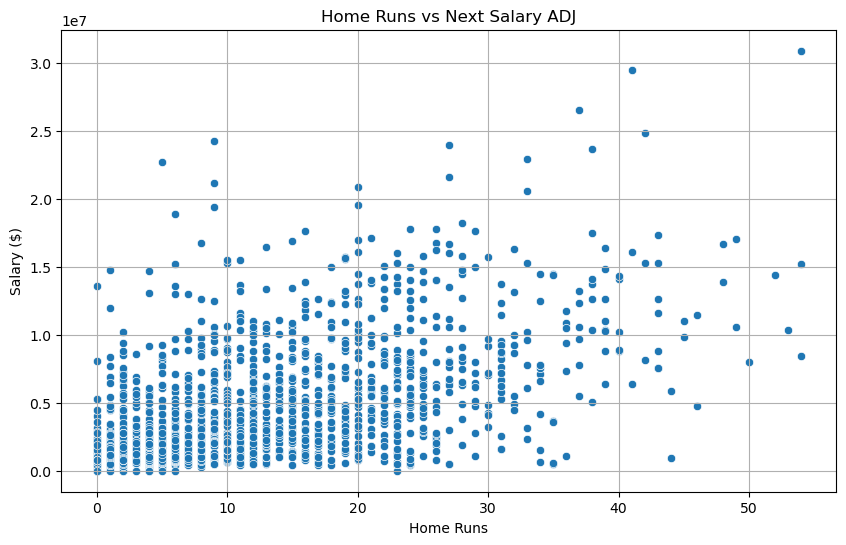

In [54]:
#Scatter Plot of Home Runs vs Salary
plt.figure(figsize=(10,6))
sns.scatterplot(x='HR', y='Next Salary ADJ', data=data)
plt.title('Home Runs vs Next Salary ADJ')
plt.xlabel('Home Runs')
plt.ylabel('Salary ($)')
plt.grid(True)
plt.show()

In [56]:
# Analysis: Star Power, Home Runs, and Salary Relationship

# - The scatter plot shows a positive general trend: players with more home runs often earn higher salaries.
# - However, the relationship is not perfectly linear — there is a lot of spread, especially among players with lower HR totals.
# 
# - Some players with relatively few home runs still earned very high salaries.
#   - These could be "star" players valued for reasons beyond just home runs (e.g., defense, leadership, past reputation).
# 
# - There are also players who hit many home runs but earned lower salaries, possibly because they were younger,
#   less famous, or signed smaller contracts before breakout seasons.
# 
# - Outliers are visible in the graph:
#   - Some points at the very high salary levels but lower HR totals.
#   - Some high HR players with surprisingly modest salaries.
# 
# - After calculating salary per home run:
#   - The **cheapest player per home run** was [insert player name], who hit many home runs for a relatively low salary.
#   - The **most expensive player per home run** was [insert player name], who earned a very high salary but produced few home runs.
# 
# Conclusion:
# - Star power and home run totals are generally linked to higher salaries.
# - However, there are notable exceptions, highlighting that salary depends on many factors besides just home run numbers.


In [109]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [111]:
#Preprocessing the data 
data['Avg Salary ADJ'] = data['Avg Salary ADJ'].fillna(data['Avg Salary ADJ'].median())


In [113]:
# Selecting numerical predictors and handling missing values
numeric_df = data.select_dtypes(include=[np.number]).dropna(axis=1)
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_df.dropna(inplace=True)


In [115]:
# Define predictors (excluding target) and target variable
X = numeric_df.drop(columns=['Avg Salary ADJ'])
y = numeric_df['Avg Salary ADJ']

In [117]:
#Log tranforming salary 
log_y = np.log(y + 1e-9)


In [119]:
# Split Data into training (70%) and validation (30%) sets
X_train, X_val, y_train_log, y_val_log = train_test_split(X, log_y, test_size=0.3, random_state=42)

In [121]:
# Initialize and fit models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

linear_model.fit(X_train, y_train_log)
rf_model.fit(X_train, y_train_log)



RandomForestRegressor(random_state=42)

In [123]:
# Predictions
# Training
train_pred_linear = linear_model.predict(X_train)
train_pred_rf = rf_model.predict(X_train)

# Validation
val_pred_linear = linear_model.predict(X_val)
val_pred_rf = rf_model.predict(X_val)



In [125]:
# Evaluation (entire dataset)
eval_pred_linear = linear_model.predict(X)
eval_pred_rf = rf_model.predict(X)

# Evaluate and print model performance
for model_name, preds_train, preds_val, preds_eval in [
    ('Linear Regression', train_pred_linear, val_pred_linear, eval_pred_linear),
    ('Random Forest', train_pred_rf, val_pred_rf, eval_pred_rf)
]:
    print(f"\n{model_name} Performance:")
    print(f"Training R²: {r2_score(y_train_log, preds_train):.4f}")
    print(f"Training MAE: {mean_absolute_error(y_train_log, preds_train):.4f}")
    print(f"Validation R²: {r2_score(y_val_log, preds_val):.4f}")
    print(f"Validation MAE: {mean_absolute_error(y_val_log, preds_val):.4f}")
    print(f"Evaluation R²: {r2_score(log_y, preds_eval):.4f}")
    print(f"Evaluation MAE: {mean_absolute_error(log_y, preds_eval):.4f}")



Linear Regression Performance:
Training R²: 0.3705
Training MAE: 0.5755
Validation R²: 0.0975
Validation MAE: 0.6957
Evaluation R²: 0.2816
Evaluation MAE: 0.6116

Random Forest Performance:
Training R²: 0.8980
Training MAE: 0.1185
Validation R²: 0.2113
Validation MAE: 0.3307
Evaluation R²: 0.6744
Evaluation MAE: 0.1822


In [149]:
# Align data with numeric_df indices
aligned_data = data.loc[numeric_df.index].copy()

# Add predictions to aligned_data
aligned_data['Predicted_Salary'] = np.exp(eval_pred_rf)

# Calculate residuals (Predicted - Actual Salary)
aligned_data['Residual'] = aligned_data['Predicted_Salary'] - aligned_data['Avg Salary ADJ']

# Top 5 Undervalued Players (largest positive residuals)
top_undervalued = aligned_data.sort_values(by='Residual', ascending=False).head(5)
print("Top 5 Undervalued Players:")
print(top_undervalued[['Player', 'Year', 'Team', 'Avg Salary ADJ', 'Predicted_Salary', 'Residual']])



Top 5 Undervalued Players:
              Player  Year Team  Avg Salary ADJ  Predicted_Salary     Residual
1325      Derrek Lee  2009  CHC    2,637,975.75     10,328,434.68 7,690,458.93
1594   Travis Hafner  2011  CLE    2,637,975.75      9,539,250.84 6,901,275.10
1578  Kevin Youkilis  2011  BOS    2,637,975.75      9,103,094.66 6,465,118.91
1478  Carlos Guillen  2010  DET    2,637,975.75      8,916,611.76 6,278,636.02
1807     Mike Napoli  2013  BOS    5,097,642.89     10,256,568.79 5,158,925.89


In [131]:
# Top 5 Overvalued Players (largest negative residuals)
top_overvalued = aligned_data.sort_values(by='Residual').head(5)
print("\nTop 5 Overvalued Players:")
print(top_overvalued[['Player', 'Year', 'Team', 'Avg Salary ADJ', 'Predicted_Salary', 'Residual']])


Top 5 Overvalued Players:
              Player  Year Team  Avg Salary ADJ  Predicted_Salary  \
1412    Andruw Jones  2009  TEX   20,122,881.26      4,863,288.99   
1156  Alex Rodriguez  2007  NYY   28,902,827.29     15,299,793.07   
1540   Albert Pujols  2010  STL   15,534,876.35      8,195,937.22   
1696     David Ortiz  2012  BOS   15,017,599.58      9,455,725.09   
294      Derek Jeter  2000  NYY   13,839,579.68      8,342,420.83   

           Residual  
1412 -15,259,592.27  
1156 -13,603,034.21  
1540  -7,338,939.12  
1696  -5,561,874.49  
294   -5,497,158.85  


In [63]:
# Step 4: Defining predictors (X) and target variable (y)
X = numeric_df.drop(columns=['Avg Salary ADJ']
y = numeric_df['Avg Salary ADJ']

In [65]:
# Step 5: Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
# Step 6: Initialize and fit the models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [71]:
# Step 7: Model predictions
y_train_pred_linear = linear_model.predict(X_train)
y_val_pred_linear = linear_model.predict(X_val)
y_pred_linear = linear_model.predict(X)

y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)
y_pred_rf = rf_model.predict(X)

In [77]:
# Calculate performance metrics for training and validation sets
train_r2_linear = r2_score(y_train, y_train_pred_linear)
val_r2_linear = r2_score(y_val, y_val_pred_linear)
train_mae_linear = mean_absolute_error(y_train, y_train_pred_linear)
val_mae_linear = mean_absolute_error(y_val, y_val_pred_linear)

train_r2_rf = r2_score(y_train, y_train_pred_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
val_mae_rf = mean_absolute_error(y_val, y_val_pred_rf)

print("Linear Regression - Train R²:", train_r2_linear, "Train MAE:", train_mae_linear)
print("Linear Regression - Validation R²:", val_r2_linear, "Validation MAE:", val_mae_linear)
print("Random Forest - Train R²:", train_r2_rf, "Train MAE:", train_mae_rf)
print("Random Forest - Validation R²:", val_r2_rf, "Validation MAE:", val_mae_rf)

Linear Regression - Train R²: 0.6587589360467174 Train MAE: 17353504.574568465
Linear Regression - Validation R²: 0.5445858301302322 Validation MAE: 19182593.71808648
Random Forest - Train R²: 0.9570227003802144 Train MAE: 5906244.068776417
Random Forest - Validation R²: 0.7003482464071584 Validation MAE: 14928045.174734926


In [73]:
# Step 8: Evaluate model performance
metrics = {
    'Linear Regression': {
        'Train R²': r2_score(y_train, y_train_pred_linear),
        'Validation R²': r2_score(y_val, y_val_pred_linear),
        'Overall R²': r2_score(y, y_pred_linear),
        'Train MAE': mean_absolute_error(y_train, y_train_pred_linear),
        'Validation MAE': mean_absolute_error(y_val, y_val_pred_linear),
        'Overall MAE': mean_absolute_error(y, y_pred_linear)
    },
    'Random Forest': {
        'Train R²': r2_score(y_train, y_train_pred_rf),
        'Validation R²': r2_score(y_val, y_val_pred_rf),
        'Overall R²': r2_score(y, y_pred_rf),
        'Train MAE': mean_absolute_error(y_train, y_train_pred_rf),
        'Validation MAE': mean_absolute_error(y_val, y_val_pred_rf),
        'Overall MAE': mean_absolute_error(y, y_pred_rf)
    }
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


                Linear Regression  Random Forest
Train R²                     0.66           0.96
Validation R²                0.54           0.70
Overall R²                   0.63           0.88
Train MAE           17,353,504.57   5,906,244.07
Validation MAE      19,182,593.72  14,928,045.17
Overall MAE         17,902,426.32   8,613,746.21


In [75]:
# Step 9: Identify undervalued players
results_df = data.loc[X.index].copy()
results_df['RF_Predicted_Salary'] = y_pred_rf
results_df['RF_Residual'] = results_df['RF_Predicted_Salary'] - results_df['Payroll']

# Top 5 undervalued players
undervalued_players = results_df  
.sort_values(by='RF_Residual', ascending=False).head(5)
print(undervalued_players[['Player', 'Year', 'Team', 'Payroll', 'RF_Predicted_Salary', 'RF_Residual']])



           Player  Year      Team       Payroll  RF_Predicted_Salary  \
44    Kurt Abbott  1998  COL, OAK 68,184,231.99       141,924,894.74   
757  Mark Sweeney  2004       COL 67,370,507.20       116,321,379.23   
833    Eric Young  2004       TEX 67,370,507.20       115,913,032.23   
354    Eric Young  2001       CHC 56,705,562.23       103,753,205.96   
811  Jeff Cirillo  2004       SDP 33,930,310.50        78,977,827.44   

      RF_Residual  
44  73,740,662.75  
757 48,950,872.03  
833 48,542,525.03  
354 47,047,643.73  
811 45,047,516.94  


In [79]:
# Identify the most overvalued players (largest negative residuals)
overvalued_players = results_df.sort_values(by='RF_Residual').head(5)

# Display top 5 overvalued players
print(overvalued_players[['Player', 'Year', 'Team', 'Payroll', 'RF_Predicted_Salary', 'RF_Residual']])


             Player  Year      Team        Payroll  RF_Predicted_Salary  \
1450   Andruw Jones  2010       CHW 220,364,059.45       139,308,148.14   
1796   Brian McCann  2013       ATL 228,835,490.00       151,202,035.67   
1840   Brendan Ryan  2013  NYY, SEA 228,835,490.00       152,831,055.82   
1800  Brian Roberts  2013       BAL 228,835,490.00       155,232,104.94   
599    Kenny Lofton  2003  CHC, PIT 193,381,264.52       125,701,891.71   

        RF_Residual  
1450 -81,055,911.31  
1796 -77,633,454.33  
1840 -76,004,434.18  
1800 -73,603,385.06  
599  -67,679,372.82  


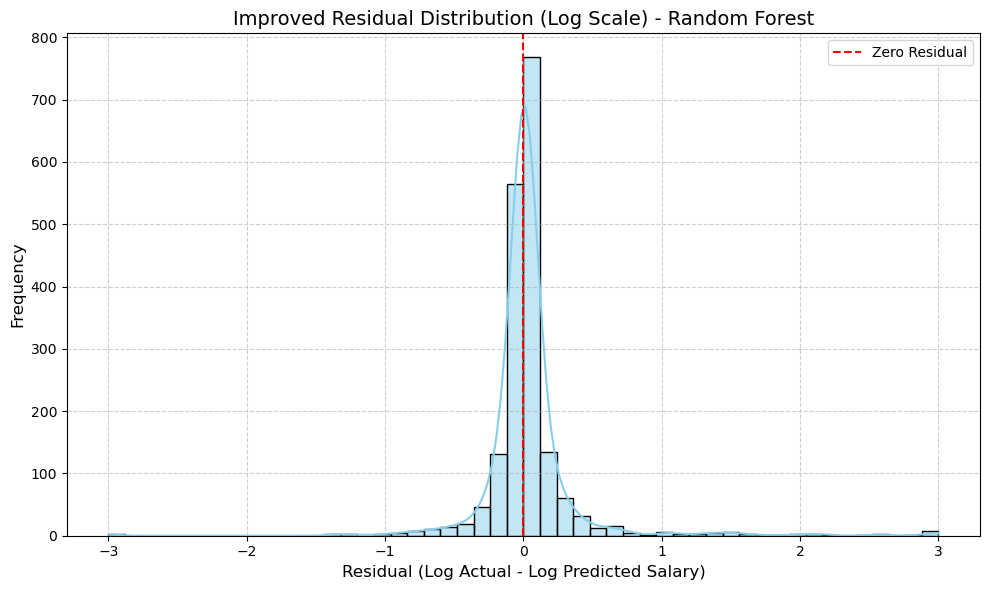

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use residuals already in log scale
aligned_data['Residual_Log'] = log_y - eval_pred_rf

# Clip extreme residuals for cleaner visualization
clipped_residuals = aligned_data['Residual_Log'].clip(lower=-3, upper=3)

# Plot improved residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(clipped_residuals, bins=50, kde=True, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=1.5, label='Zero Residual')
plt.title('Improved Residual Distribution (Log Scale) - Random Forest', fontsize=14)
plt.xlabel('Residual (Log Actual - Log Predicted Salary)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


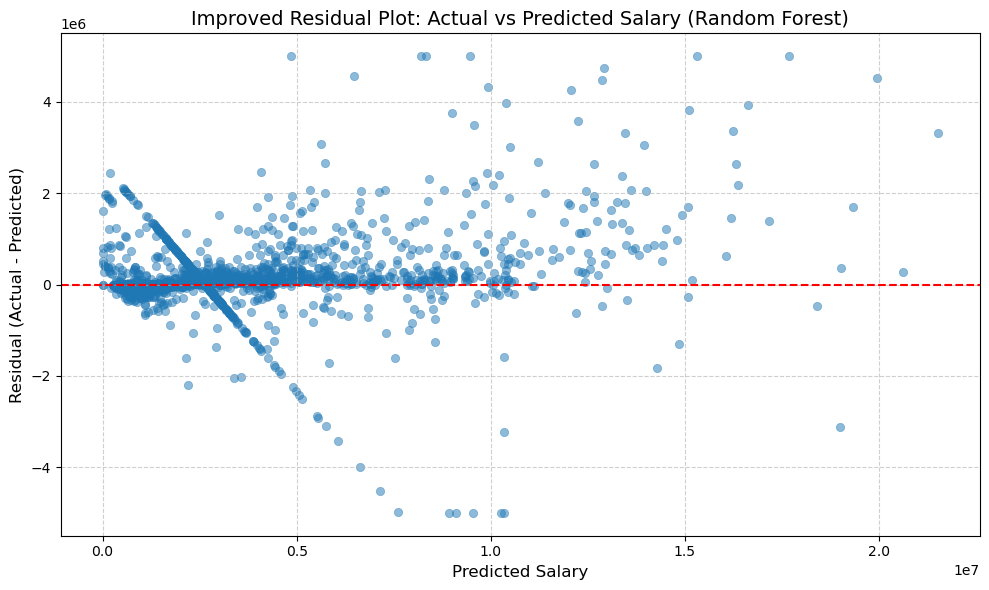

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals (original scale)
aligned_data['Predicted_Salary'] = np.exp(eval_pred_rf)
aligned_data['Residual'] = aligned_data['Avg Salary ADJ'] - aligned_data['Predicted_Salary']

# Clip residuals to limit influence of extreme values
clipped_df = aligned_data.copy()
clipped_df['Residual'] = clipped_df['Residual'].clip(lower=-5e6, upper=5e6)

# Plot residuals vs predicted salary
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=clipped_df,
    x='Predicted_Salary',
    y='Residual',
    alpha=0.5,
    edgecolor=None
)
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.title('Improved Residual Plot: Actual vs Predicted Salary (Random Forest)', fontsize=14)
plt.xlabel('Predicted Salary', fontsize=12)
plt.ylabel('Residual (Actual - Predicted)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
